### Hi this is a test

## Importing Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


anime_df = pd.read_csv("../data/processed/cleaned_imputed_anime.csv")

In [3]:
anime_df.drop(columns=['dataset'], inplace=True)
anime_df.head(5)

,anime_id,name,genre,type,episodes,rating,members,themes,demographics,producers,studios,source,duration(mins),popularity,favorites
0,17467.0,Otoko Ippiki Gaki Daishou,"Action, Drama, Shounen",TV,156.0,7.200000,158.000000,Delinquents,Shounen,AT-X,Tokyo TV Douga,Manga,10.000000,12711.000000,2.000000
1,37007.0,Unknown,Unknown,Unknown,0.0,6.208692,3486.114429,"Combat Sports, School",Shounen,"Nihon Ad Systems, Pony Canyon, Shueisha, BS11,...",Gonzo,Manga,23.000000,1923.000000,357.000000
2,5702.0,Sora wo Miageru Shoujo no Hitomi ni Utsuru Sekai,"Action, Fantasy, Magic, Romance, Super Power",TV,9.0,7.270000,24799.000000,Super Power,Unknown,Unknown,Kyoto Animation,Original,24.000000,3759.000000,140.000000
3,26147.0,Nagasaki no Kouma,"Historical, Kids",Movie,1.0,7.330000,50.000000,Unknown,Unknown,Unknown,Unknown,Unknown,34.878176,10448.067844,34.494473
4,22247.0,Azumi Mamma★Mia,"Comedy, Kids",TV,60.0,5.600000,101.000000,Unknown,Unknown,Unknown,Unknown,Unknown,12.070050,15182.016412,2.549512


### Basic Visualization

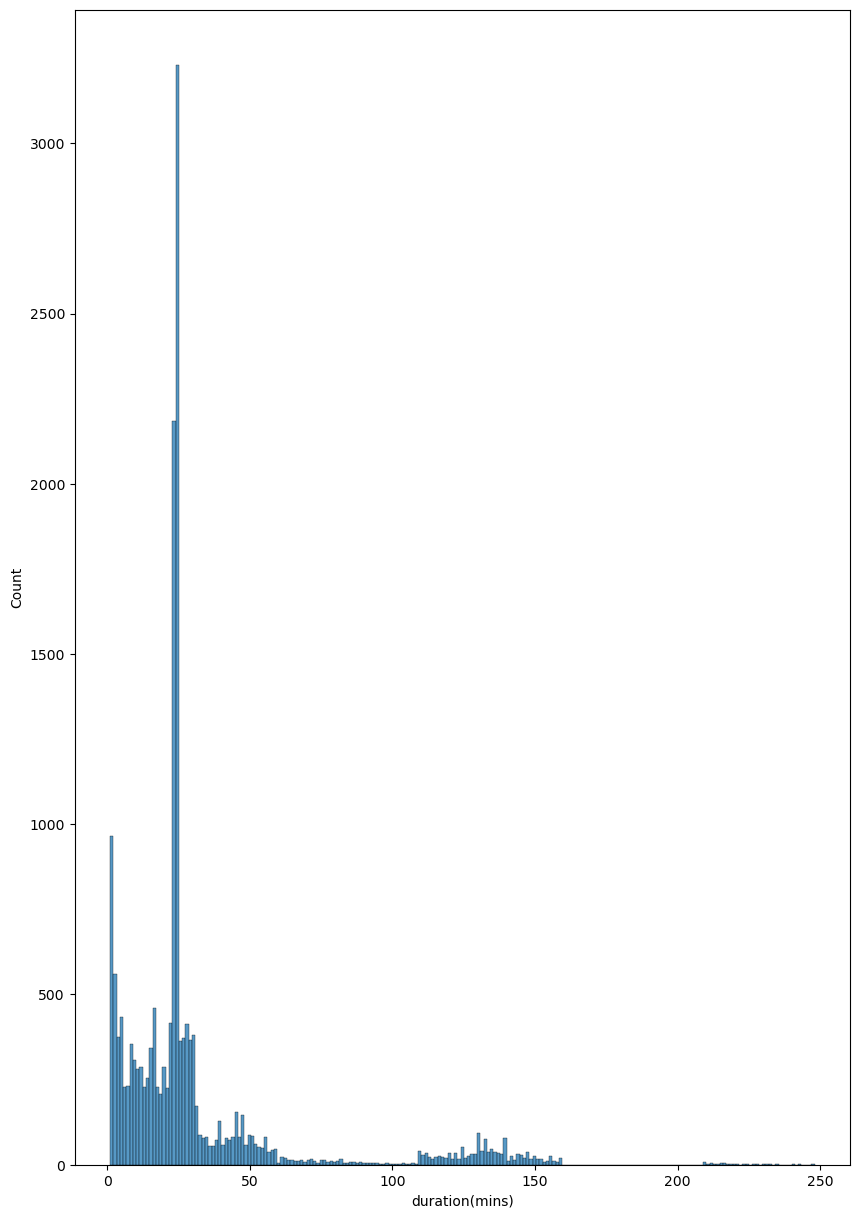

In [6]:
plt.figure(figsize=(10,15))
sns.histplot(anime_df, x='duration(mins)')
plt.ylabel("Count")
plt.show()

### Analysis

- This plot makes sense since most of the shows have a duration butween 23-25 mins.